In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [17]:
df = pd.read_csv('data/order_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181527 entries, 0 to 181526
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             181527 non-null  int64  
 1   order_date           181527 non-null  object 
 2   recency_days         181527 non-null  int64  
 3   order_status         181527 non-null  object 
 4   shipping_days        118342 non-null  float64
 5   user_id              181527 non-null  int64  
 6   gender               181527 non-null  object 
 7   age                  181527 non-null  int64  
 8   product_id           181527 non-null  int64  
 9   num_of_item          181527 non-null  int64  
 10  sale_price           181527 non-null  float64
 11  product_cost         181527 non-null  float64
 12  profit               181527 non-null  float64
 13  product_category     181527 non-null  object 
 14  brand                181379 non-null  object 
 15  product_departmen

In [7]:
df

,order_id,order_date,recency_days,order_status,shipping_days,user_id,gender,age,product_id,num_of_item,sale_price,product_cost,profit,product_category,brand,product_department,distribution_center
0,10,2020-03-01,1293,Shipped,2.0,8,F,62,13123,1,49.99,23.45,26.54,Swim,Sons of Anarchy,Women,Houston TX
1,23,2023-01-01,0,Shipped,0.0,24,F,44,1952,1,145.00,64.23,80.77,Fashion Hoodies & Sweatshirts,TEXTILE Elizabeth and James,Women,Houston TX
2,24,2021-10-01,0,Shipped,2.0,26,F,63,14274,1,3.99,1.57,2.42,Accessories,Greatlookz,Women,Houston TX
3,29,2020-11-01,0,Shipped,2.0,34,F,48,3273,1,128.00,53.63,74.37,Dresses,Jessica Simpson,Women,Los Angeles CA
4,35,2023-04-01,0,Shipped,0.0,39,F,35,446,2,41.99,25.15,16.84,Tops & Tees,Fashion Forever,Women,Mobile AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181522,125144,2022-05-01,0,Processing,NaN,99939,M,26,21087,1,89.50,48.33,41.17,Jeans,Tommy Hilfiger,Men,Memphis TN
181523,125167,2023-07-01,0,Processing,NaN,99959,M,55,25965,2,19.00,9.84,9.16,Underwear,Mundo Unico,Men,Memphis TN
181524,125167,2023-07-01,0,Processing,NaN,99959,M,55,19334,2,80.00,36.32,43.68,Sweaters,Schaefer Outfitters,Men,Los Angeles CA
181525,125196,2023-03-01,0,Processing,NaN,99987,M,32,25043,2,9.38,6.01,3.37,Socks,HUGO BOSS,Men,Chicago IL


In [71]:
#extract kpi from df
kpi = df[['order_date','order_id','product_id','num_of_item','sale_price']].copy(deep=True)
kpi['total_price'] = kpi['num_of_item'] * kpi['sale_price']
kpi['order_date'] = pd.to_datetime(kpi['order_date'])
kpi.set_index('order_date', inplace=True)
#sort by index
kpi.sort_index(inplace=True)

In [27]:
kpi

,order_id,product_id,num_of_item,sale_price,total_price
order_date,,,,,
2019-01-01,52233,20172,3,41.30,123.90
2019-01-01,97619,24318,1,42.99,42.99
2019-01-01,80088,12441,1,25.95,25.95
2019-01-01,25078,22900,1,27.99,27.99
2019-01-01,68501,28092,3,26.95,80.85
...,...,...,...,...,...
2023-09-01,23872,13680,1,102.90,102.90
2023-09-01,88335,1039,2,42.00,84.00
2023-09-01,88335,3916,2,9.64,19.28


In [142]:
resampled_data = kpi[['total_price', 'num_of_item']].resample('D').sum()

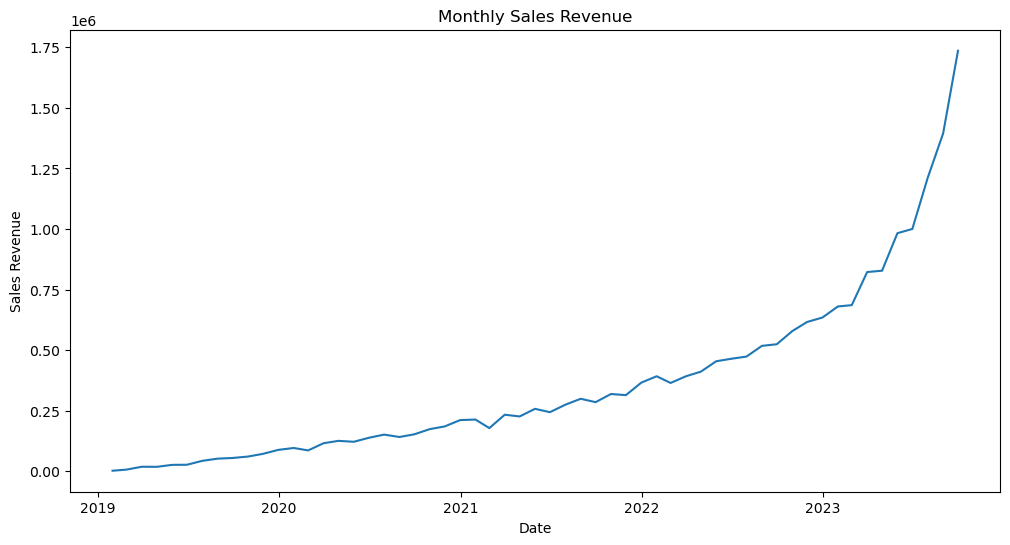

In [60]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(resampled_data)
plt.title('Monthly Sales Revenue')
plt.xlabel('Date')
plt.ylabel('Sales Revenue')
plt.show()

In [143]:
resampled_data

,total_price,num_of_item
order_date,,
2019-01-01,2040.21,46
2019-01-02,0.00,0
2019-01-03,0.00,0
2019-01-04,0.00,0
2019-01-05,0.00,0
...,...,...
2023-08-28,0.00,0
2023-08-29,0.00,0
2023-08-30,0.00,0


In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

In [144]:
# Split the data into training and testing sets
train_size = int(len(resampled_data) * 0.8)
train_data, test_data = resampled_data[:train_size], resampled_data[train_size:]

# # Create and train an Exponential Smoothing model
# model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
# model_fit = model.fit()

# # Make predictions
# predictions = model_fit.forecast(len(test_data))

# # Evaluate the model
# rmse = sqrt(mean_squared_error(test_data, predictions))
# print(f'Root Mean Squared Error (RMSE): {rmse}')

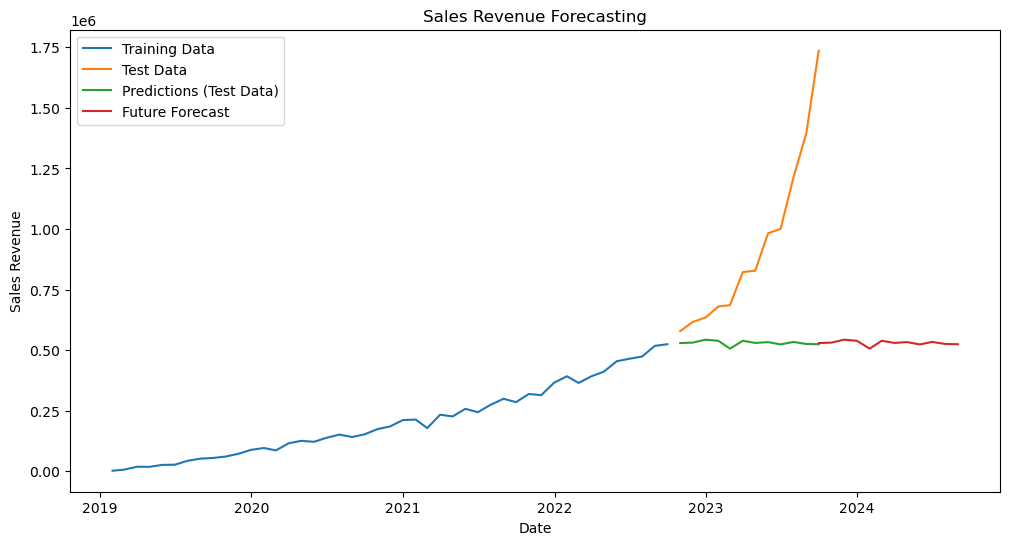

In [33]:
# Forecast future sales revenue
forecast_horizon = 12  # Number of periods into the future you want to forecast
future_forecast = model_fit.forecast(forecast_horizon)

# Plot the actual vs. predicted sales revenue
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(predictions, label='Predictions (Test Data)')
plt.plot(pd.date_range(start=resampled_data.index[-1], periods=forecast_horizon, freq='M'), future_forecast, label='Future Forecast')
plt.title('Sales Revenue Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales Revenue')
plt.legend()
plt.show()

In [35]:
import pmdarima
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import arch

In [145]:
horizon=360
seasonality=360
target='total_price'

In [146]:
train_df = train_data
test_df = test_data

# separate exogenous variables (x) from the target variable (y)
y_train = train_df[target].values
x_train = train_df.drop(target, axis=1).values
y_test = test_df[target].values
x_test = test_df.drop(target, axis=1).values

print(f"y_train: {y_train.shape}, x_train: {x_train.shape}, y_test: {y_test.shape}, x_test: {x_test.shape}")

y_train: (1364,), x_train: (1364, 1), y_test: (341,), x_test: (341, 1)


Finally, we normalize the data in the range 
. We use a different scaler for the exogenous variables (
) and the target variable (
).

In [147]:
# automatically fit the optimal ARIMA model for given time series
arima_model = pmdarima.auto_arima(
    y_train, exogenous=x_train,
    start_p=1, start_q=1,
    max_p=4, max_q=4, m=seasonality,
    start_P=0, seasonal=True,
    d=1, D=1, trace=True,
    error_action='ignore',   # don't want to know if an order does not work
    suppress_warnings=True,  # don't want convergence warnings
    stepwise=True)
print(arima_model.summary())

Performing stepwise search to minimize aic


KeyboardInterrupt: 

After the model is fit, we collect the training residuals 
. The residuals give us an idea of how well the ARIMA model fits the training data.

In [130]:
# collect training residuals
train_res = arima_model.arima_res_.resid

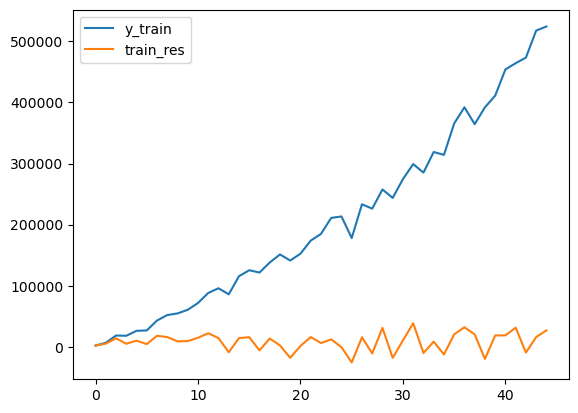

In [131]:
# plot residuals and training data
plt.plot(y_train, label='y_train')
plt.plot(train_res, label='train_res')
plt.legend()
plt.show()

Ideally, the residuals should be pure noise and, thus, uncorrelated with each other. To check this, we look at the autocorrelation and partial autocorrelation plots.

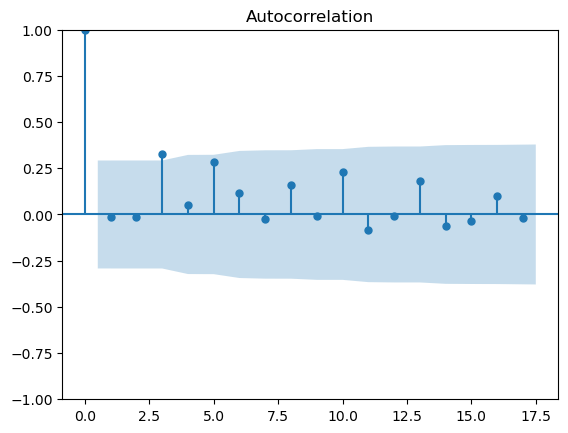

In [132]:
squared_train_res = train_res**2 
plot_acf(squared_train_res)
plt.show()

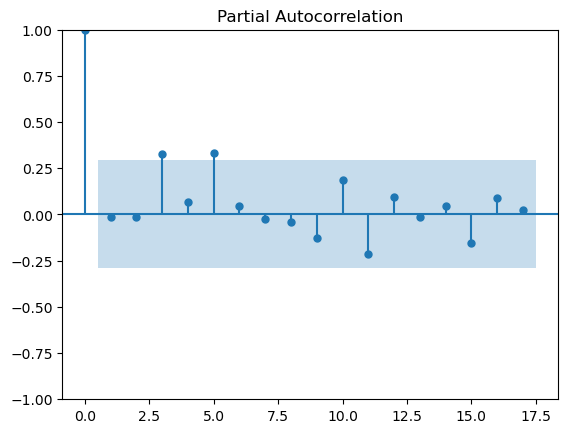

In [133]:
plot_pacf(squared_train_res)
plt.show()

We see that there are some correlations left in the residuals, meaning that the ARIMA model was not able to fully explain the variability in the data.

## Making Forecast

Now that the model is fit, we can use it to make predictions at horizon steps ahead. After making each prediction, we update the ARIMA model with the new data as they become available. Also, we collect the residuals on the test data and the CI at the 
 confidence level.

In [106]:
from tqdm import tqdm

In [135]:
y_test

array([ 578260.05,  616110.04,  634556.52,  680146.76,  685623.99,
        822303.37,  827789.81,  982731.83, 1000179.95, 1211595.32,
       1394356.98, 1736040.86])

In [136]:
y_hat

array([547457.7702587, 542733.2802587, 594237.9902587, 620656.5202587,
       593032.7102587, 620594.1602587, 639717.8402587, 682687.0802587,
       692794.4602587, 701997.9102587, 746189.6402587, 752877.8202587])

In [134]:
# Make predictions and update the model
pred_list, ci_list, res_list = [], [], []
for step in tqdm(range(y_test.shape[0]//horizon)):
    y_hat, conf_int = arima_model.predict(n_periods=horizon, return_conf_int=True, alpha=0.1)
    pred_list.append(y_hat)
    ci_list.append(conf_int)
    res_list.append(y_test[step*horizon:(step+1)*horizon, 0] - y_hat)
    arima_model.update(
        y_test[step*horizon:(step+1)*horizon], 
        exogenous=x_test[step*horizon:(step+1)*horizon])
    
# collect predictions, CI, and residuals
preds = np.hstack(pred_list)[...,None]
preds_ci = np.vstack(ci_list)
test_res = np.hstack(res_list)

  0%|          | 0/1 [00:00<?, ?it/s]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [137]:
tot_res = np.concatenate((train_res, test_res))

# specify garch model
garch = arch.arch_model(
    tot_res, 
    vol='garch', 
    p=1, q=2)

# fit the garch model
garch_fitted = garch.fit(
    last_obs=train_res.shape[0] # specify where train data ends
    )

Iteration:      1,   Func. Count:      7,   Neg. LLF: 494.7924133033504
Iteration:      2,   Func. Count:     14,   Neg. LLF: 498.6108626378848
Iteration:      3,   Func. Count:     21,   Neg. LLF: 493.3798010566073
Iteration:      4,   Func. Count:     28,   Neg. LLF: 493.93598794473866
Iteration:      5,   Func. Count:     35,   Neg. LLF: 493.00329013613236
Iteration:      6,   Func. Count:     41,   Neg. LLF: 492.9978503679446
Iteration:      7,   Func. Count:     47,   Neg. LLF: 492.9977559125056
Iteration:      8,   Func. Count:     53,   Neg. LLF: 492.9977516783576
Iteration:      9,   Func. Count:     58,   Neg. LLF: 492.9977516784186
Optimization terminated successfully    (Exit mode 0)
            Current function value: 492.9977516783576
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


c:\Users\ramdh\anaconda3\envs\thelook_ecommerce\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.147e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [138]:
# forecasts with garch
garch_forecast = garch_fitted.forecast(
    start=train_res.shape[0], # specify where forecasting starts
    horizon=horizon, 
    )

garch_var = garch_forecast.variance['h.'+str(horizon)].iloc[train_res.shape[0]:].values
garch_mean = garch_forecast.mean['h.'+str(horizon)].iloc[-test_res.shape[0]:].values

c:\Users\ramdh\anaconda3\envs\thelook_ecommerce\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


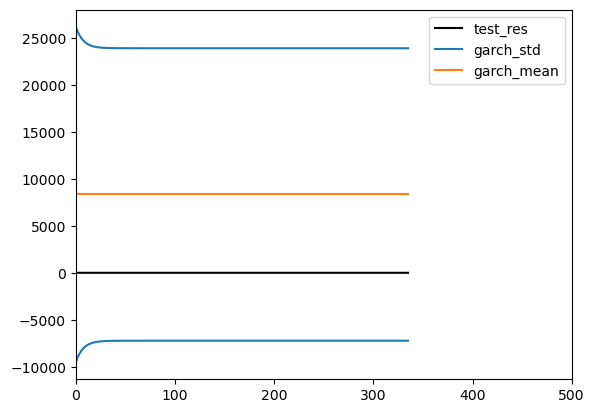

In [139]:
plt.plot(test_res, label='test_res', color='k')
plt.plot(garch_mean-np.sqrt(garch_var), color=plt.cm.tab10(0), label='garch_std')
plt.plot(garch_mean+np.sqrt(garch_var), color=plt.cm.tab10(0))
plt.plot(garch_mean, color=plt.cm.tab10(1), label='garch_mean')
plt.xlim([0,500])
plt.legend()
plt.show()